In [112]:
import pandas as pd
import numpy as np
from scipy.sparse.linalg import aslinearoperator, lsqr
import tqdm
import sys
sys.path.append("../../")
from DynamicalSystems.kernels import RBF
from DynamicalSystems.reduced_rank_regression import reduced_rank_regression

In [ ]:
kernel = RBF(length_scale=np.float32(10))
inputs = _data[:-1]
evolved_inputs = _data[1:]
regularizer = np.float32(1e-3)
evals_old, evecs_old = reduced_rank_regression(inputs, evolved_inputs, kernel, 5, regularizer=regularizer, center_kernel=True, _cumbersome_diagonalization= True)
evals, evecs = reduced_rank_regression(inputs, evolved_inputs, kernel, 5, regularizer=regularizer, center_kernel=True, _cumbersome_diagonalization=False)

In [118]:
df_pd = pd.read_pickle("full_dataframe").interpolate(axis=0)
df = df_pd.to_numpy()
nan_mask = np.isnan(df).any(axis=1)
dataset_indexes = []
stride = 1
for idx, val in enumerate(nan_mask[:-stride]):
    if val == False:
        if nan_mask[idx + stride] == False:
            dataset_indexes.append((idx, idx+ stride))
#Get stations and measurements 
stations = set()
measurements = set()
for col in df_pd.columns:
    meas, stat = col.split("_")
    measurements.add(meas)
    stations.add(stat)
length_scales = dict()
for m in measurements:
    length_scales[m] = df_pd.filter(regex= m + "_*").std().mean()


In [119]:
length_scales

{'wd': 107.03089217724636,
 'SO2': 21.63083414917557,
 'PM10': 91.74635855866636,
 'TEMP': 11.431957023826078,
 'DEWP': 13.786785008778159,
 'RAIN': 0.8186257871497914,
 'NO2': 33.1759092219302,
 'O3': 56.876577257430505,
 'WSPM': 1.2350852262906835,
 'CO': 1147.735767655295,
 'PM2.5': 80.52736033435879,
 'PRES': 10.274581206264541}

107.03089217724636

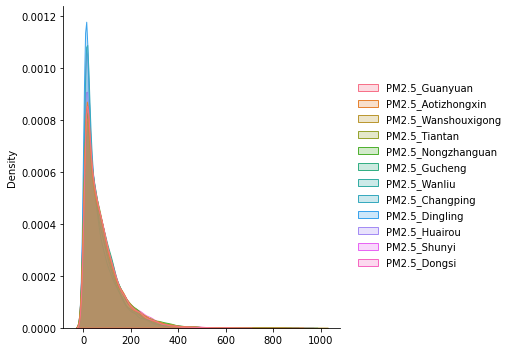

In [105]:
import seaborn as sns
ax = sns.displot(df_pd.filter(regex="PM2.5_*"), kind='kde', fill=True)